In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
sns.set()

In [2]:
raw_data  = pd.read_csv("C:/Users/LENOVO/Downloads/1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# determining  the varaibles of interest

In [4]:
data = raw_data.copy()

In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis=0)

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## explore the PDF

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\455825866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price']) # for the probability density function for price
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

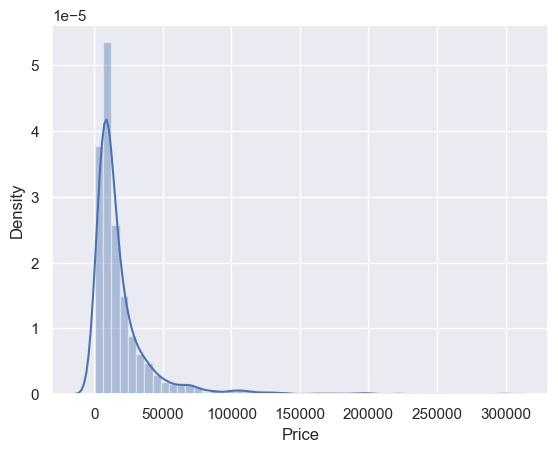

In [9]:
sns.distplot(data_no_mv['Price']) # for the probability density function for price

# dealing with outliers


In [10]:
q =data_no_mv['Price'].quantile(0.99) 
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

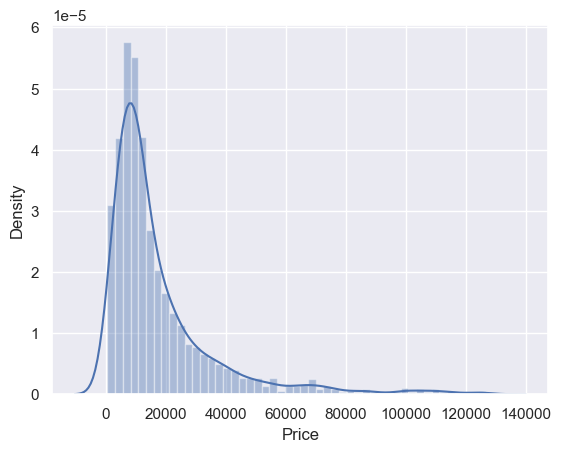

In [11]:
sns.distplot(data_1['Price'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Density'>

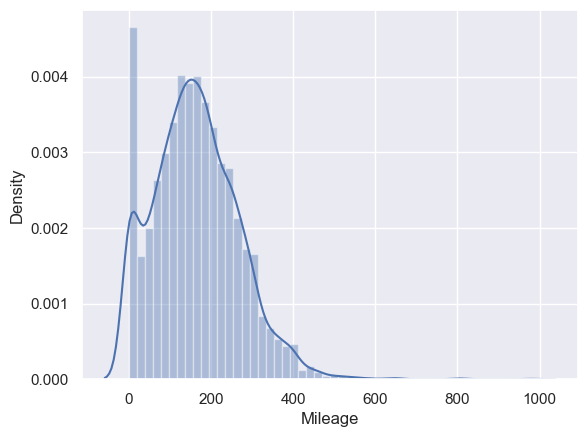

In [12]:
sns.distplot(data_no_mv['Mileage'])

In [13]:
q =data_no_mv['Mileage'].quantile(0.99) 
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000,3943
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1510,NaN,NaN,1825,3575,NaN,185
mean,NaN,17936.780614,NaN,161.414659,2.747497,NaN,NaN,2006.393102,NaN
std,NaN,19009.750360,NaN,95.940408,4.981033,NaN,NaN,6.593870,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21417.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\1547815769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Mileage'])
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Density'>

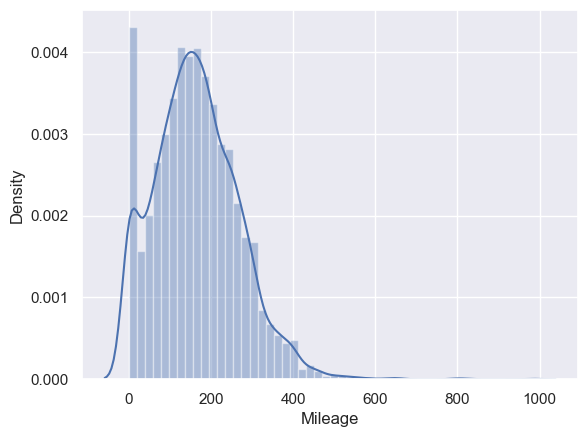

In [14]:
sns.distplot(data_1['Mileage'])

In [15]:
data_3 = data_1[data_1['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3961,3961.000000,3961,3961.000000,3961.000000,3961,3961,3961.000000,3961
unique,7,NaN,6,NaN,NaN,4,2,NaN,301
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,875,NaN,1516,NaN,NaN,1846,3596,NaN,188
mean,NaN,17890.545307,NaN,164.935370,2.442704,NaN,NaN,2006.308255,NaN
std,NaN,19009.523529,NaN,102.848849,0.944481,NaN,NaN,6.673304,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21200.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\1659869432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['EngineV'])
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EngineV', ylabel='Density'>

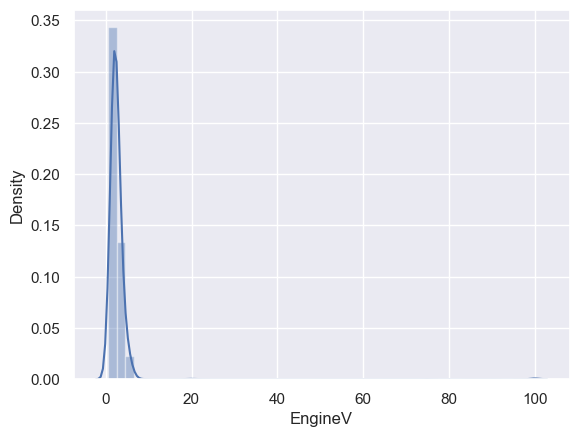

In [16]:
sns.distplot(data_1['EngineV'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\3193621445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Year'])
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Density'>

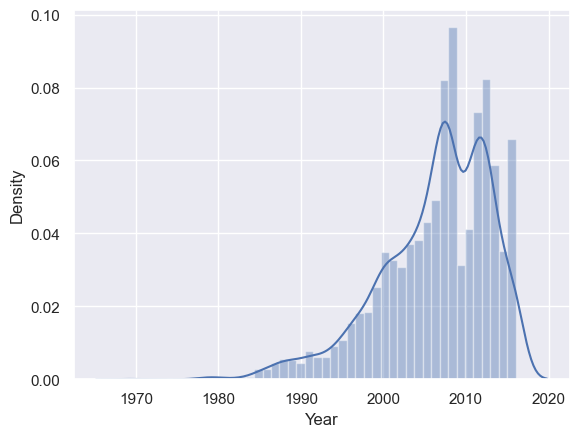

In [17]:
sns.distplot(data_1['Year'])

In [18]:
q =data_no_mv['Year'].quantile(0.01) 
data_4 = data_3[data_3['Year']>q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3905,3905.000000,3905,3905.000000,3905.000000,3905,3905,3905.000000,3905
unique,7,NaN,6,NaN,NaN,4,2,NaN,295
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,861,NaN,1482,NaN,NaN,1835,3540,NaN,183
mean,NaN,18100.297083,NaN,164.107298,2.449795,NaN,NaN,2006.620487,NaN
std,NaN,19056.178291,NaN,102.377608,0.947793,NaN,NaN,6.173623,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7150.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\3193621445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Year'])
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Density'>

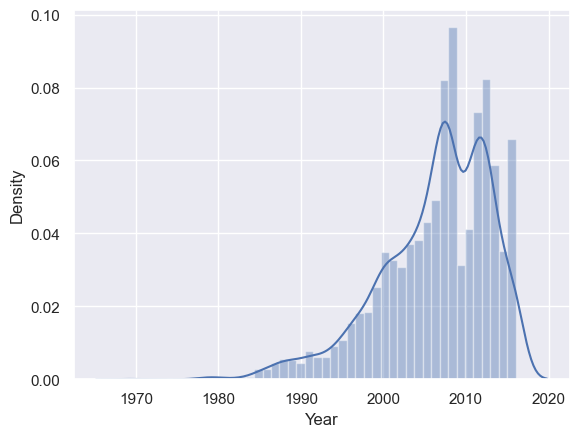

In [19]:
sns.distplot(data_1['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3905.000000,3905.000000,3905.000000,3905.000000
mean,18100.297083,164.107298,2.449795,2006.620487
std,19056.178291,102.377608,0.947793,6.173623
min,800.000000,0.000000,0.600000,1988.000000
25%,7150.000000,92.000000,1.800000,2003.000000
50%,11500.000000,159.000000,2.200000,2008.000000
75%,21500.000000,230.000000,3.000000,2012.000000
max,129222.000000,980.000000,6.300000,2016.000000


# Checking the OLS assumptions

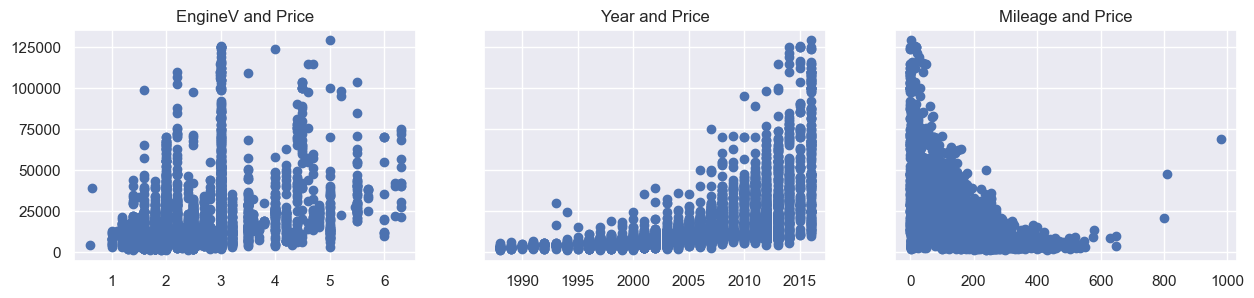

In [21]:
f,(ax1,ax2,ax3) =plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax1.set_title('EngineV and Price')
ax2.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax2.set_title('Year and Price')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Mileage and Price')

plt.show()

# relax assumptions


In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3900,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3901,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3902,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3903,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


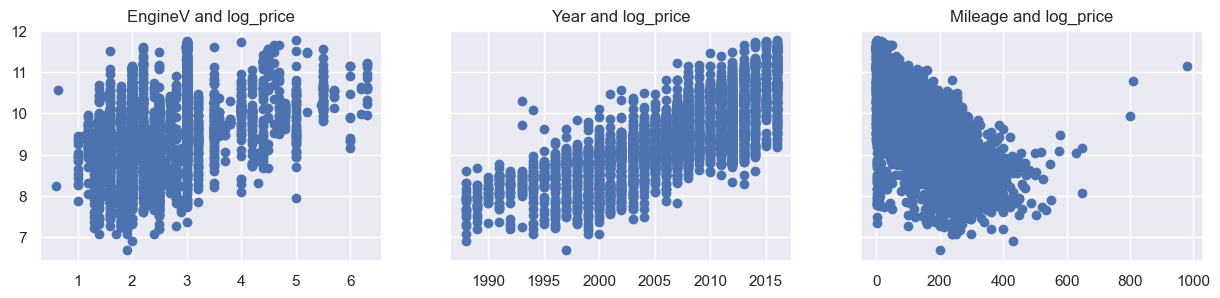

In [23]:
f,(ax1,ax2,ax3) =plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax1.set_title('EngineV and log_price')
ax2.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax2.set_title('Year and log_price')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Mileage and log_price')

plt.show()

In [24]:
data_cleaned = data_cleaned.drop('Price',axis=1)

In [25]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3900,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3901,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3902,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3903,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557


# Multicollinearity

In [26]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [27]:
# check by using VIF (variance)
from statsmodels.stats.outliers_influence  import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])] 
vif['features'] = variables.columns

In [28]:
vif  # vif = 1 (no multicollinearity )
    # 1<vif<5 (perfectly Okay) 
    # vif>10 (not okay)

,VIF,features
0,3.546054,Mileage
1,10.140993,Year
2,7.680951,EngineV


In [29]:
data_no_multicollinearity = data_cleaned.drop('Year',axis=1)

# create dummy variables

In [84]:
data_with_dummies  = pd.get_dummies(data_no_multicollinearity, drop_first = True)
for col in data_with_dummies.select_dtypes(include=['bool']).columns:
    data_with_dummies[col] = data_with_dummies[col].astype(int)
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch',
       ...
       'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5', 'Model_X5 M',
       'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3', 'Model_Z4'],
      dtype='object', length=312)

# Rearrange  a bit

In [31]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_324', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_65

In [85]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_324', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_750', 'Model_760', 'Model_80',
       'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 400', 'Model_CLS 500',
       'Model_CLS 63 AMG', 'Model_Caddy', 'Model_Camry', 'Model_Captur',
       'Model_Caravelle', 'Model_Carina', 'Model_Carisma', 'Model_Celica',
       'Model_Clio', 'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B2', 'Model_Passat B3', 'Model_Passat B4',
       'Model_Passat B5', 'Model_Passat B6', 'Model_Passat B7',
       'Model_Passat B8', 'Model_Passat CC', 'Model_Phaeton',
       'Model_Pointer', 'Model_Polo', 'Model_Previa', 'Model_Prius',
       'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320', 'Model_R8',
       'Model_Rav 4', 'Model_S 140', 'Model_S 250', 'Model_S 300',
       'Model_S 320', 'Model_S 350', 'Model_S 400', 'Model_S 420',
       'Model_S 430', 'Model_S 500', 'Model_S 550', 'Model_S 600',
       'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4', 'Model_S5',
       'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter', 'Model_Sprinter 208', 'Model_Sprinter 210',
       'Model_Sprinter 211', 'Model_Sprinter 212', 'Model_Sprinter 213',
       'Model_Sprinter 311', 'Model_Sprinter 312', 'Model_Sprinter 313',
       'Model_Sprinter 315', 'Model_Sprinter 316', 'Model_Sprinter 318',
       'Model_Sprinter 319', 'Model_Symbol', 'Model_Syncro',
       'Model_T3 (Transporter)', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Tundra', 'Model_Up', 'Model_V 250', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3',
       'Model_Z4']

In [86]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.34,277,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.97,427,2.90,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.50,358,5.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.04,240,4.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.81,120,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# VIF Categorical 

In [87]:
variables = data_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

C:\Users\LENOVO\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,6.07,log_price
1,2.72,Mileage
2,7.31,EngineV
3,737.94,Brand_BMW
4,1311.26,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,7.15,Body_hatch


In [88]:
variables = data_preprocessed.drop('log_price',axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

C:\Users\LENOVO\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.81,Mileage
1,7.31,EngineV
2,652.69,Brand_BMW
3,1209.55,Brand_Mercedes-Benz
4,inf,Brand_Mitsubishi
5,inf,Brand_Renault
6,inf,Brand_Toyota
7,inf,Brand_Volkswagen
8,7.12,Body_hatch
9,6.09,Body_other


In [89]:
data_with_dummies_new = pd.get_dummies(data_no_multicollinearity)
for col in data_with_dummies_new.select_dtypes(include=['bool']).columns:
    data_with_dummies_new[col] = data_with_dummies_new[col].astype(int)

In [90]:
data_with_dummies_new.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
variables = data_with_dummies_new.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

C:\Users\LENOVO\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.81,Mileage
1,7.31,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


# Linear Regression

In [92]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price',axis=1)
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,163,2.50,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3901,35,1.60,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3902,9,3.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3903,1,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(inputs)
inputs_scaled = scalar.transform(inputs)
inputs_scaled

array([[ 1.10285014, -0.47463188,  2.28649736, ..., -0.05998372,
        -0.01600461, -0.03580574],
       [ 2.56820191,  0.47506423, -0.43735017, ..., -0.05998372,
        -0.01600461, -0.03580574],
       [ 1.89414009,  2.69102183, -0.43735017, ..., -0.05998372,
        -0.01600461, -0.03580574],
       ...,
       [-1.51524503,  0.58058602, -0.43735017, ..., -0.05998372,
        -0.01600461, -0.03580574],
       [-1.59339712,  1.10819498,  2.28649736, ..., -0.05998372,
        -0.01600461, -0.03580574],
       [-0.39180867, -0.47463188, -0.43735017, ..., -0.05998372,
        -0.01600461, -0.03580574]])

## Train Test Split

In [94]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

# create the regression

In [95]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [96]:
y_hat = reg.predict(x_train)

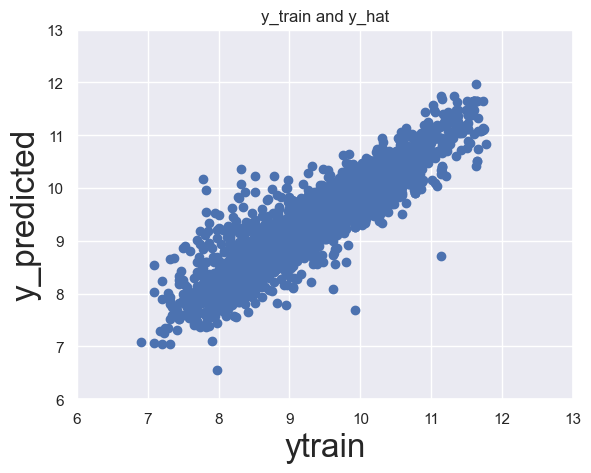

In [97]:
plt.scatter(y_train,y_hat)
plt.title('y_train and y_hat')
plt.xlabel('ytrain',fontsize=24)
plt.ylabel('y_predicted',fontsize=24)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\1253393601.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat)
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals PDF')

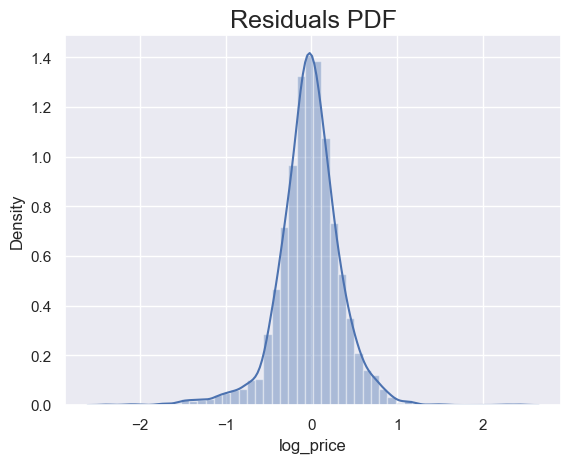

In [98]:
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',size=18)

In [99]:
reg.score(x_train,y_train)

0.8251319503683564

In [100]:
reg.intercept_

-306124123214.0949

In [101]:
reg.coef_

array([-3.40728921e-01, -2.01617539e-02,  3.99160913e+12,  1.44458010e+13,
        2.53074421e+12, -6.85937634e+10,  5.15802031e+12,  1.13927111e+13,
       -4.70059113e-02, -1.97448730e-02, -6.11572266e-02, -5.27343750e-02,
       -3.78417969e-02, -1.02539062e-01, -3.14331055e-02, -1.24023438e-01,
        3.22265625e-01,  6.72558696e+11,  1.77458061e+11,  4.41894531e-02,
        4.38232422e-02, -7.81250000e-03,  2.50931452e+11, -8.14207562e+11,
       -8.14207562e+11, -7.05214804e+11, -5.75879255e+11, -5.75879255e+11,
        1.77458061e+11, -4.07260289e+11, -2.81281597e+12,  1.07269287e-02,
        6.78710938e-02,  1.14990234e-01,  8.36181641e-03,  0.00000000e+00,
        4.19921875e-02,  3.88031006e-02,  5.23681641e-02,  3.96728516e-02,
        2.69927979e-02,  2.18038301e+12, -7.30324274e+10,  2.31933594e-02,
        3.88183594e-02,  1.85302734e-01,  6.03027344e-02, -9.15527344e-04,
        8.07495117e-02,  6.44531250e-02,  1.28662109e-01,  8.54492188e-02,
        3.13720703e-02,  

In [102]:
reg_summary = pd.DataFrame(inputs.columns.values,columns =['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.34
1,EngineV,-0.02
2,Brand_BMW,3991609131616.91
3,Brand_Mercedes-Benz,14445801012499.36
4,Brand_Mitsubishi,2530744212235.71
5,Brand_Renault,-68593763430.16
6,Brand_Toyota,5158020306691.74
7,Brand_Volkswagen,11392711095382.59
8,Body_hatch,-0.05
9,Body_other,-0.02


## Testing 

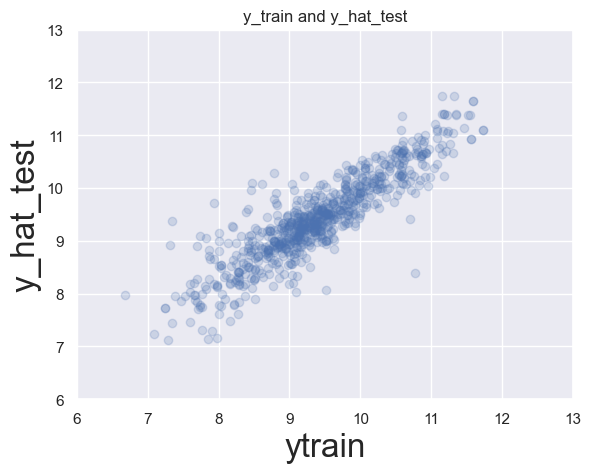

In [112]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.title('y_train and y_hat_test')
plt.xlabel('ytrain',fontsize=24)
plt.ylabel('y_hat_test',fontsize=24)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [113]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25300\3645756891.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])


,Prediction
0,5313.16
1,2948.57
2,35641.37
3,31330.77
4,5328.75
5,2276.25
6,2695.21
7,8253.33
8,23101.86
9,2408.90


In [114]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,5313.16,8200.00
1,2948.57,2350.00
2,35641.37,36500.00
3,31330.77,28500.00
4,5328.75,6300.00
5,2276.25,1400.00
6,2695.21,3250.00
7,8253.33,7700.00
8,23101.86,20500.00
9,2408.90,2300.00


In [106]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.01
1    7.76
2   10.51
3   10.26
4    8.75
Name: log_price, dtype: float64

In [107]:
df_pf['Residual'] =df_pf['Target'] -df_pf['Prediction']

In [108]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [109]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,781.00,145.00,145.00,145.00
mean,inf,16469.67,-inf,inf
std,NaN,15536.58,NaN,NaN
min,0.00,1400.00,-inf,0.06
25%,7500.08,7300.00,-9603.33,29.91
50%,11707.45,11700.00,948.01,69.50
75%,21681.01,18700.00,6408.04,157.40
max,inf,99999.00,91366.47,inf


In [111]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' %x )
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
532,17209.81,17200.00,-9.81,0.06
376,16175.02,16300.00,124.98,0.77
590,27934.28,27700.00,-234.28,0.85
296,17678.25,17900.00,221.75,1.24
334,11258.95,10999.00,-259.95,2.36
544,9037.99,8700.00,-337.99,3.88
722,13098.93,12500.00,-598.93,4.79
697,18508.56,17500.00,-1008.56,5.76
122,11215.05,11950.00,734.95,6.15
491,20248.43,21600.00,1351.57,6.26
